This code creates plots for quantities in dependence of densities of passive particles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv

In [2]:
#set plot parameters

#change figure size
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 6
plt.rcParams['figure.figsize'] = figure_size

#set line width
plt.rcParams['lines.linewidth'] = 2

#set label size in the plots
plt.rcParams.update({'font.size': 18})

In [3]:
#create lists for quantities for graphical representation (plots)
list_of_densities = []
list_of_sq_end_to_end_distances = []
list_of_sq_end_to_end_distances_err = []
list_of_diffusion_constants = []
list_of_diffusion_constants_err = []
list_of_rouse_times = []
list_of_rouse_times_err = []

averaged_quantities = open('averages_for_plots_different_densities','r')
lines = csv.reader(averaged_quantities, delimiter='	')

for line in lines:

        #time has to be multiplied by dt, otherwise it is number of timesteps
        list_of_densities.append(float(line[0]))

        list_of_sq_end_to_end_distances.append(float(line[1]))
        list_of_sq_end_to_end_distances_err.append(float(line[2]))
        list_of_diffusion_constants.append(float(line[3]))
        list_of_diffusion_constants_err.append(float(line[4]))
        list_of_rouse_times.append(float(line[5]))
        list_of_rouse_times_err.append(float(line[6]))


#close the file
averaged_quantities.close()

# Create the plot (sq. end-to-end distances)

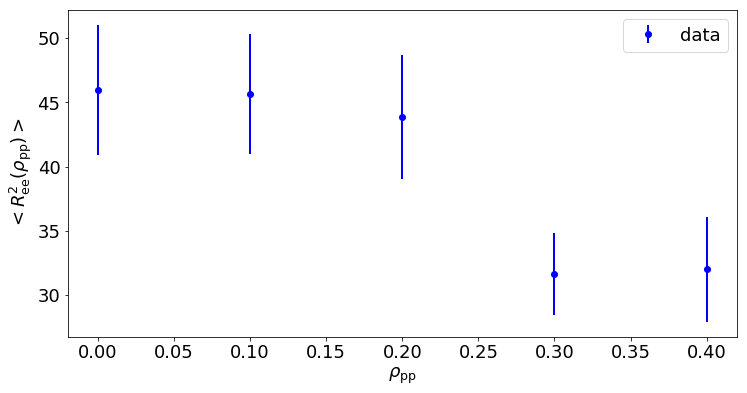

'\n#exp(const); keep power the same\nparameters = [np.exp(popt[0]), (popt[1])]\n\n#to calculate error, use Gaussian error propagation\nerrors = [np.absolute(popt[0]*np.exp(popt[0])*perr[0]),perr[1]]\n\n#print parameters\nprint ("exp(parameters) = "+str(parameters)+" +/- "+str(errors))\n'

In [4]:
#covert arrays into numpy arrays and use short names (use x and y)
x = np.array(list_of_densities)
y = np.array(list_of_sq_end_to_end_distances)
y_err = np.array(list_of_sq_end_to_end_distances_err)

"""
#do not use first two elements due to hard fluctuation
x_log = np.log(x)
y_log = np.log(y)


#define fit function; take independent variable as first argument
def func_sq_ee_dinstance_in_dependence_of_N(list_of_Bonds_log, const, power):
    
    #Attention: <R_ee^2> depends on BONDS!
    return const + power*list_of_Bonds_log

#fit the curve using function
popt, pcov = curve_fit(func_sq_ee_dinstance_in_dependence_of_N,
                       list_of_Bonds_log, y_log)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

#define function to represent results (same as above
#but not log)
def func_show_sq_ee_dinstance_in_dependence_of_N(N, const, power):
    
    #Attention: <R_ee^2> depends on BONDS!
    return np.exp(const) * ((N-1)**power)
"""

#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.errorbar(x, y, y_err, color='blue', marker='o', label='data', fmt='.')

"""
#skip first two values for representation
plt.plot(N, func_show_sq_ee_dinstance_in_dependence_of_N(N, *popt),
         'r-', label=('fit'))
"""

#save the plot
plt.legend(loc='best')

#plt.xscale('log')

#set ticks
#plt.yscale('log')
plt.xlabel(r'$\rho_{\mathrm{pp}}$')
plt.ylabel(r'$<R_{\mathrm{ee}}^2(\rho_{\mathrm{pp}})>$')
plt.draw()
plt.savefig('sq_distance_in_dependence_of_density.png')
plt.show()
plt.close()

"""
#exp(const); keep power the same
parameters = [np.exp(popt[0]), (popt[1])]

#to calculate error, use Gaussian error propagation
errors = [np.absolute(popt[0]*np.exp(popt[0])*perr[0]),perr[1]]

#print parameters
print ("exp(parameters) = "+str(parameters)+" +/- "+str(errors))
"""